In [1]:
import requests
from html import unescape
from bs4 import BeautifulSoup, Comment
from io import BytesIO

from PIL import Image
import re

In [2]:
resp = requests.get('https://www.facebook.com/dan.ailenei.9')

In [3]:
resp

<Response [200]>

In [13]:
soup = BeautifulSoup(resp.content, 'html.parser')

In [6]:
scripts = soup.find_all('script')

In [9]:
for script in scripts:
    print('\n' * 4)
    print(script)

In [22]:
def fun(alt):
    return '' in alt

In [30]:
resp = requests.get('https://m.facebook.com/dan.ailenei.9')
soup = BeautifulSoup(resp.content, 'html.parser')

In [32]:
resp.status_code

200

In [33]:
resp = requests.get('https://www.facebook.com/photo.php?fbid=1517843281656424&set=a.105070466267053')
soup = BeautifulSoup(resp.content, 'html.parser')

In [34]:
elems = soup.find_all('img', attrs={'alt': re.compile('Fotografia de profil.*Este posibil ca imaginea să conţină: \d+ persoană')})

In [36]:
soup.find_all('img')

[<img alt="" class="scaledImageFitWidth img" data-ft='{"tn":"-^"}' height="500" itemprop="image" src="https://scontent.ftsr1-2.fna.fbcdn.net/v/t1.0-1/p720x720/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&amp;_nc_ht=scontent.ftsr1-2.fna&amp;oh=39bfa18bb8ae851bbf2a5b62ec1fea79&amp;oe=5D38EEF6" width="500"/>,
 <img class="tracking_pixel"/>,
 <img height="0" src="https://facebook.com/security/hsts-pixel.gif?c=3.2.5" style="display:none" width="0"/>,
 <img height="0" src="https://facebook.com/security/hsts-pixel.gif?c=3.2.5" style="display:none" width="0"/>]

In [80]:
for e in soup.find_all('img', attrs={'src': re.compile('1517843281656424')}):
    print(e)
    print(e.get('src'))

<img alt="" class="scaledImageFitWidth img" data-ft='{"tn":"-^"}' height="500" itemprop="image" src="https://scontent-otp1-1.xx.fbcdn.net/v/t1.0-1/p720x720/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&amp;_nc_ht=scontent-otp1-1.xx&amp;oh=a1ee218fb9f75330c82565719cf9904b&amp;oe=5D38EEF6" width="500"/>
https://scontent-otp1-1.xx.fbcdn.net/v/t1.0-1/p720x720/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&_nc_ht=scontent-otp1-1.xx&oh=a1ee218fb9f75330c82565719cf9904b&oe=5D38EEF6


https://scontent-otp1-1.xx.fbcdn.net/v/t1.0-1/p240x240/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&_nc_ht=scontent-otp1-1.xx&oh=5bdca747093e3db43cb76f1201d8e09d&oe=5D2A394D
https://scontent-otp1-1.xx.fbcdn.net/v/t1.0-1/p720x720/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&_nc_ht=scontent-otp1-1.xx&oh=a1ee218fb9f75330c82565719cf9904b&oe=5D38EEF6

https://scontent-otp1-1.xx.fbcdn.net/v/t1.0-1/c7.0.240.240a/p240x240/15192631_1150553581646420_4044226788970299112_n.jpg?_nc_cat=101&_nc_ht=scontent-otp1-1.xx&oh=93440c66dfcee8d127b710e81f4667dd&oe=5D315322

Extrage facebook id-ul din imagine url ca sa fac match la poza

In [56]:
for el in elems:
    print(el.get('alt'))
    print(el.get('src'))
    print(el.parent)

In [66]:
elems = soup.find_all()

In [75]:
for el in elems:
    if re.search('profil', str(el)):
        print(el)
        print()

<html xmlns="http://www.w3.org/1999/xhtml"><head><title>Dan Ailenei | Facebook</title><meta content="default" id="meta_referrer" name="referrer"/><style type="text/css">/*<![CDATA[*/.de{padding:8px;text-shadow:0 1px 0 #fff;}.bl .s{display:block;}.s{border:solid 2px;cursor:pointer;margin:0;padding:2px 6px 3px;text-align:center;}.bm,.h .ba,.b a.bm,.b .h a.ba{background:#f3f4f5;border-color:#ccc #aaa #999;color:#505c77;}.h .bm,.ba,.b .h a.bm,.b a.ba,.b a.ba:visited{background:#3b5998;border-color:#8a9ac5 #29447E #1a356e;color:#fff;}.t,.b a.t,.b a.t:visited{background:#69a74e;border-color:#98c37d #3b6e22 #2c5115;color:#fff;}.s .k{pointer-events:none;}.s{display:inline-block;}.s+.s{margin-left:3px;}.s input{background:none;border:none;margin:0;padding:0;}.bm input,.h .ba input{color:#505c77;}.h .bm input,.ba input,.t input{color:#fff;}.b a,.b a:visited{color:#3b5998;text-decoration:none;}.b a:focus,.b a:hover{background-color:#3b5998;color:#fff;}.bc{background:#fff;}.bo{background:#e9ebee;}

In [15]:
# odata a fost prima imagine iar altadata a 2-a
img_url = elems[0].get('src')

In [16]:
image_request = requests.get(img_url)

In [17]:
image_bytes = image_request.content

In [18]:
img = Image.open(BytesIO(image_bytes))

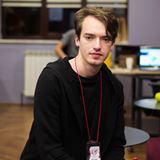

In [19]:
img

In [7]:
url = 'https://www.facebook.com/mouna.joudar.massaoudi'
resp = requests.get(url, allow_redirects=False)
resp.status_code

404

In [6]:
resp.cookies

<RequestsCookieJar[Cookie(version=0, name='fr', value='1IOKnFQEc8o4SzFlV..BcpI2w.f5.AAA.0.0.BcpI2w.AWVK9Cpr', port=None, port_specified=False, domain='.facebook.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1562064053, discard=False, comment=None, comment_url=None, rest={'httponly': None}, rfc2109=False)]>

In [12]:
BASE_URL = 'https://www.facebook.com'
LOGIN_URL = f'{BASE_URL}/login'

headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
}

response = requests.get(LOGIN_URL, headers=headers, verify=False)

headers['cookie'] = '; '.join([x.name + '=' + x.value for x in response.cookies])
headers['content-type'] = 'application/x-www-form-urlencoded'
payload = {
    'username': 'aileneidan@yahoo.com',
    'pass': 'chineziiardmeleaguri'
}

response = requests.post(LOGIN_URL, data=payload, headers=headers, verify=False, allow_redirects=False)
headers['cookie'] = '; '.join([x.name + '=' + x.value for x in response.cookies])

C:\Users\Dan\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Dan\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[]
[]


In [8]:
resp.content

b'<!DOCTYPE html>\n<html lang="ro" id="facebook" class="no_js">\n<head><meta charset="utf-8" /><meta name="referrer" content="default" id="meta_referrer" /><script>window._cstart=+new Date();</script><script>function envFlush(a){function b(b){for(var c in a)b[c]=a[c]}window.requireLazy?window.requireLazy(["Env"],b):(window.Env=window.Env||{},b(window.Env))}envFlush({"ajaxpipe_token":"AXgJo8mPjugVF7ai","timeslice_heartbeat_config":{"pollIntervalMs":33,"idleGapThresholdMs":60,"ignoredTimesliceNames":{"requestAnimationFrame":true,"Event listenHandler mousemove":true,"Event listenHandler mouseover":true,"Event listenHandler mouseout":true,"Event listenHandler scroll":true},"isHeartbeatEnabled":true,"isArtilleryOn":false},"shouldLogCounters":true,"timeslice_categories":{"react_render":true,"reflow":true},"sample_continuation_stacktraces":true,"dom_mutation_flag":true,"stack_trace_limit":30,"deferred_stack_trace_rate":1000,"timesliceBufferSize":5000,"show_invariant_decoder":false,"isCQuick":

In [34]:
resp = requests.get('https://www.facebook.com/photo.php?fbid=10213913833541606&set=a.1364986486345&type=3&theater')
resp.status_code

200

Pagina DESPRE, pentru a lua date publice

In [2]:
resp = requests.get('https://www.facebook.com/dan.ailenei.9/about?lst=100002923005583%3A100002923005583%3A1553619791&section=contact-info')
resp.status_code

200

In [3]:
soup = BeautifulSoup(resp.content, 'html.parser')

In [4]:
soup.find_all("span")

[<span class="mrm _3bcv _50f3">Sari la</span>,
 <span class="_55pe">Secţiuni ale acestei pagini</span>,
 <span class="_4o_3 _3-99"><i class="img sp_CDBF8O5xgeq sx_2cde5d"></i></span>,
 <span class="_55pe">Ajutor pentru accesibilitate</span>,
 <span class="_4o_3 _3-99"><i class="img sp_CDBF8O5xgeq sx_591efb"></i></span>,
 <span class="_3bcz">alt</span>,
 <span class="_3bcz">/</span>,
 <span class="muffin_tracking_pixel_start"></span>,
 <span class="muffin_tracking_pixel_end"></span>,
 <span class="coverWrap coverImage" data-cropped="1" id="fbCoverImageContainer"><img alt="Fotografie de copertă, Este posibil ca imaginea să conţină: 1 persoană" class="coverPhotoImg photo img" data-fbid="560574384049990" src="https://scontent.fclj2-1.fna.fbcdn.net/v/t31.0-8/c0.68.851.315a/p851x315/1782472_560574384049990_728731316_o.jpg?_nc_cat=101&amp;_nc_ht=scontent.fclj2-1.fna&amp;oh=6ae8bff72a3e363efa42c94a4b0745ae&amp;oe=5D0B7F27" style="top:0px;width:100%"/><div class="coverBorder"></div><img alt="" 

# Intrebarea cea mai buna e ... cand crap?

In [ ]:
while resp.status_code == 200:
    resp = requests.get('https://www.facebook.com/photo.php?fbid=10213913833541606&set=a.1364986486345&type=3&theater')

Nu crapa

In [4]:
def drop_in_file(filepath, content):
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write(content)

In [5]:
soup = get_soup('..\\mypage.html')

In [9]:
drop_in_file('clear.html', soup.prettify())

In [10]:
soup = get_soup('clear.html')

In [11]:
for el in soup.find_all('code'):
    print(el)

In [3]:
resp = requests.get('https://m.facebook.com/dan.ailenei.9/friends')

In [13]:
drop_in_file("test_mobile.html", resp.content.decode('utf-8'))

INCERCAM SITE UL DE MOBILE

am rulat scraperul ca sa ia prima pagina de prieteni

In [4]:
def replace_with_prety(filepath):
    soup = get_soup(filepath)
    drop_in_file(filepath, soup.prettify())

In [8]:
filepath = '..\\mypage.html'
replace_with_prety(filepath)

In [9]:
soup = get_soup(filepath)

In [10]:
href_reg = re.compile(r'/\w+(\.(\w+\.?)+)?\d*\?')

In [13]:
def re_filter(href):
    return href and href_reg.search(href) and \
        ('profile.php' in href or 'php' not in href) and \
        'dan.ailenei.9' not in href and \
        'pazvante.chioru.9678' not in href

In [14]:
a = soup.find_all(href=re_filter); len(a)

24

In [15]:
for e in a:
    print(e['href'])
    match = href_reg.match(e['href'])
    print(match.group())
    

/alinamaria99?fref=fr_tab
/alinamaria99?
/alex.plesoiu?fref=fr_tab
/alex.plesoiu?
/anamaria.bejan.904?fref=fr_tab
/anamaria.bejan.904?
/nicoleta.vlad.923?fref=fr_tab
/nicoleta.vlad.923?
/dragoi.vlad.3?fref=fr_tab
/dragoi.vlad.3?
/malinaaaaaaaa12?fref=fr_tab
/malinaaaaaaaa12?
/ramonalarisa.turcu?fref=fr_tab
/ramonalarisa.turcu?
/anamaria.dobrita.5?fref=fr_tab
/anamaria.dobrita.5?
/manu.alex.56?fref=fr_tab
/manu.alex.56?
/mr.alexbalas?fref=fr_tab
/mr.alexbalas?
/mirunika?fref=fr_tab
/mirunika?
/busteaga.mihail?fref=fr_tab
/busteaga.mihail?
/gavrilas.andrei?fref=fr_tab
/gavrilas.andrei?
/profile.php?id=100001142799907&fref=fr_tab
/profile.php?
/rosalia.maria406?fref=fr_tab
/rosalia.maria406?
/daria.cookie?fref=fr_tab
/daria.cookie?
/maria.toma.395?fref=fr_tab
/maria.toma.395?
/AnaElmana?fref=fr_tab
/AnaElmana?
/daniela.constantin.14224?fref=fr_tab
/daniela.constantin.14224?
/iulia.moldovan.92?fref=fr_tab
/iulia.moldovan.92?
/tia.grosan?fref=fr_tab
/tia.grosan?
/sarca.septimiu?fref=fr_tab


/costras.alexandra

LISTA NEAGRA:
php
propriul nume
userul curent

Nota: Contentu la taguri e numele real

INCA NU SUNT CONSIDERATE LINKURILE DE GENU /profile.php?id=100001142799907
rezolvat

In [3]:
filepath_real = '../real_facebook.html'
filepath_mobile = '../mobile_facebook.html'
# replace_with_prety(filepath_mobile)

In [4]:
def get_soup(filename):
    with open(filename,  'r', encoding='utf-8') as f:
        content = f.read()
        soup = BeautifulSoup(content, 'html.parser')
    return soup
# soup.find_all(attrs={"href": re.compile(".*https://www.facebook.com/alexandra.donisan.*")})
# for link in soup.find_all('a'):
#     print(link.get())

In [5]:
soup_real = get_soup(filepath_real)
soup_mobile = get_soup(filepath_mobile)

In [6]:
for e in soup_real.find_all(lambda x: isinstance(x, Comment)):
print(e)

In [86]:
regex = re.compile("fotografia.*?profil.*?este posibil ca imaginea să conţină:.*?\d (\w+) ?, ", flags=re.I)

def get_stuff(soup):
    imgs = soup.find_all('img', alt=regex)  #.find_parent('a').get('href')
    return [im.find_parent('a') for im in imgs]


l = soup_real.find_all(string=lambda x: isinstance(x, Comment) and 'd' in x)
for el in l:
    soup_comment = BeautifulSoup(el.string, 'html.parser')
    imgs_urls = get_stuff(soup_comment)
    if imgs_urls:
        break
else:    
    imgs_urls = get_stuff(soup_real)
    if imgs_urls:
        print(imgs_urls.pop().get('href'))
    print('You should not end up here')
print(imgs_urls.pop().get('href'))
# if imgs_urls:
   # return new request 

https://www.facebook.com/photo.php?fbid=1517843281656424&set=a.105070466267053&type=3&source=11&referrer_profile_id=100002923005583


In [7]:
for e in soup_mobile.find_all('img', attrs={'alt': 'Dan Ailenei'}):
    print(e)
    print(e.get('src'))
    print()

<img alt="Dan Ailenei" class="bz q" src="https://scontent.ftsr1-2.fna.fbcdn.net/v/t1.0-1/cp0/e15/q65/p74x74/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&amp;efg=eyJpIjoiYiJ9&amp;_nc_ht=scontent.ftsr1-2.fna&amp;oh=5169e6ad3ba8b84ce20d2ff0a82b6afe&amp;oe=5D401FAF"/>
https://scontent.ftsr1-2.fna.fbcdn.net/v/t1.0-1/cp0/e15/q65/p74x74/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&efg=eyJpIjoiYiJ9&_nc_ht=scontent.ftsr1-2.fna&oh=5169e6ad3ba8b84ce20d2ff0a82b6afe&oe=5D401FAF

<img alt="Dan Ailenei" class="dj bz q" src="https://scontent.ftsr1-2.fna.fbcdn.net/v/t1.0-1/cp0/e15/q65/p32x32/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&amp;efg=eyJpIjoiYiJ9&amp;_nc_ht=scontent.ftsr1-2.fna&amp;oh=04198e9cbf1d1ae063de9616fa3f91a3&amp;oe=5D33F6D2"/>
https://scontent.ftsr1-2.fna.fbcdn.net/v/t1.0-1/cp0/e15/q65/p32x32/25353612_1517843281656424_5882133087425243915_n.jpg?_nc_cat=107&efg=eyJpIjoiYiJ9&_nc_ht=scontent.ftsr1-2.fna&oh=04198e9cbf1d1ae063de9616f

In [14]:
resp = requests.get('https://facebook.com/dan.ailenei.9')
soup = BeautifulSoup(resp.content, 'html.parser')

In [41]:
# f = lambda x:"de profil" in x.string
# s = soup.find_all(f)
# s
re.findall('.{100}de profil .{100}', resp.text)
with open('wtf.html', 'w', encoding='utf-8') as f:
    f.write(resp.text)

In [20]:
# daca nu esti logat nu da comentarii aparent
comments = soup.find_all(string=lambda text: isinstance(text, Comment))


In [5]:
for e in soup_mobile.find_all('a', href=re.compile('/photo.php')):
    print(e)
    print()
    print(e.get('href'))
    print()

NameError: name 'soup_mobile' is not defined

In [2]:
with open("../real_facebook.html", encoding='utf-8') as f:
    content = f.read()

In [2]:
for line in re.findall(r"<img[^<>]*?posibil ca imaginea .*? />", content):
    m = re.search(r'src="(.+?)"', line)
    print(line)
    print()
    print(m.group(1).replace("&amp;", "&"))
    print('\n' * 3)


NameError: name 're' is not defined

In [31]:
for line in re.findall(r'"/photo.php?.*?"', unescape(content)):
    print(line[1:-1])
    print()

In [55]:
content[199900: 199994]

':100%" data-fbid="560574384049990" alt="Fotografie de copert&#x103;, Este posibil ca imaginea '

In [23]:
html.unescape("https://www.facebook.com/settings?ref=mb&amp;drop")

'https://www.facebook.com/settings?ref=mb&drop'